In [15]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np
import os

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
base_dir = '/home/iplab/Desktop/Shaker/Brain tumor MRI and CT scan/data(processed)'

# read mr and ct datasets
MR_train_address = os.path.join(base_dir, 'train_input.npy')
CT_train_address = os.path.join(base_dir, 'train_output.npy')

MR_val_address = os.path.join(base_dir, 'val_input.npy')
CT_val_address = os.path.join(base_dir, 'val_output.npy')

MR_test_address = os.path.join(base_dir, 'test_input.npy')
CT_test_address = os.path.join(base_dir, 'test_output.npy')

mr_train = np.load(MR_train_address)
ct_train = np.load(CT_train_address)

mr_val = np.load(MR_val_address)
ct_val = np.load(CT_val_address)

mr_test = np.load(MR_test_address)
ct_test = np.load(CT_test_address)

ct_train.shape, ct_val.shape, ct_test.shape

((570, 256, 256), (90, 256, 256), (150, 256, 256))

In [18]:
# resizes a 1d numpy array to an arbitrary size
def resize(img, size):

  img = img.astype('float32')
  img = torch.tensor(img)
  img = img.unsqueeze(0)

  transform = T.Resize(size)
  resized_img = transform(img)

  # resized_img = np.array(resized_img)

  return resized_img

In [19]:
change_gray_level = T.Compose([
    T.Lambda(lambda t: t * 0.2)
])

horizontal_flip = T.Compose([
    T.functional.hflip
])

vertical_flip = T.Compose([
    T.functional.vflip
])

rotate_45 = T.Compose([
    T.Lambda(lambda t: T.functional.rotate(t, angle=45))
])

rotate_minus_45 = T.Compose([
    T.Lambda(lambda t: T.functional.rotate(t, angle=-45))
])

In [20]:
n_train_samples = ct_train.shape[0]
n_val_samples = ct_val.shape[0]
n_test_samples = ct_test.shape[0]

# remove 90 samples from test data and add it to train data
n_add_from_test_to_train = 90

n_train_new = n_train_samples + n_val_samples + n_add_from_test_to_train
n_test_new = n_test_samples - n_add_from_test_to_train

# data augmentation
# add 5 varient of each sample
# so our train dataset will be 6 times bigger

# n_train_new = n_train_new * 6

mr_train_resized = [None] * n_train_new
ct_train_resized = [None] * n_train_new

mr_test_resized = [None] * n_test_new
ct_test_resized = [None] * n_test_new

# train samples with augmentation
for i in range(n_train_samples):

#   j = i * 6
  j = i

  resized_mr = resize(mr_train[i], 64)

  mr_train_resized[j] = resized_mr
#   mr_train_resized[j+1] = change_gray_level(resized_mr)
#   mr_train_resized[j+2] = horizontal_flip(resized_mr)
#   mr_train_resized[j+3] = vertical_flip(resized_mr)
#   mr_train_resized[j+4] = rotate_45(resized_mr)
#   mr_train_resized[j+5] = rotate_minus_45(resized_mr)

  resized_ct = resize(ct_train[i], 64)

  ct_train_resized[j] = resized_ct
#   ct_train_resized[j+1] = change_gray_level(resized_ct)
#   ct_train_resized[j+2] = horizontal_flip(resized_ct)
#   ct_train_resized[j+3] = vertical_flip(resized_ct)
#   ct_train_resized[j+4] = rotate_45(resized_ct)
#   ct_train_resized[j+5] = rotate_minus_45(resized_ct)


# validation samples with augmentation
for i in range(n_val_samples):

#   j = i*6 + n_train_samples*6
  j = i + n_train_samples

  resized_mr = resize(mr_val[i], 64)

  mr_train_resized[j] = resized_mr
#   mr_train_resized[j+1] = change_gray_level(resized_mr)
#   mr_train_resized[j+2] = horizontal_flip(resized_mr)
#   mr_train_resized[j+3] = vertical_flip(resized_mr)
#   mr_train_resized[j+4] = rotate_45(resized_mr)
#   mr_train_resized[j+5] = rotate_minus_45(resized_mr)

  resized_ct = resize(ct_val[i], 64)

  ct_train_resized[j] = resized_ct
#   ct_train_resized[j+1] = change_gray_level(resized_ct)
#   ct_train_resized[j+2] = horizontal_flip(resized_ct)
#   ct_train_resized[j+3] = vertical_flip(resized_ct)
#   ct_train_resized[j+4] = rotate_45(resized_ct)
#   ct_train_resized[j+5] = rotate_minus_45(resized_ct)


# part of test samples with augmentation

for i in range(n_add_from_test_to_train):

#   j = i*6 + n_train_samples*6 + n_val_samples*6
  j = i + n_train_samples + n_val_samples

  resized_mr = resize(mr_test[i], 64)

  mr_train_resized[j] = resized_mr
#   mr_train_resized[j+1] = change_gray_level(resized_mr)
#   mr_train_resized[j+2] = horizontal_flip(resized_mr)
#   mr_train_resized[j+3] = vertical_flip(resized_mr)
#   mr_train_resized[j+4] = rotate_45(resized_mr)
#   mr_train_resized[j+5] = rotate_minus_45(resized_mr)

  resized_ct = resize(ct_test[i], 64)

  ct_train_resized[j] = resized_ct
#   ct_train_resized[j+1] = change_gray_level(resized_ct)
#   ct_train_resized[j+2] = horizontal_flip(resized_ct)
#   ct_train_resized[j+3] = vertical_flip(resized_ct)
#   ct_train_resized[j+4] = rotate_45(resized_ct)
#   ct_train_resized[j+5] = rotate_minus_45(resized_ct)

# test samples
for i in range(n_test_new):

  j = i + n_add_from_test_to_train

  mr_test_resized[i] = resize(mr_test[j], 64)
  ct_test_resized[i] = resize(ct_test[j], 64)

/home/iplab/anaconda3/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [21]:
# convert train and test samples to numpy array
for i in range(n_train_new):
  mr_train_resized[i] = np.array(mr_train_resized[i].squeeze())
  ct_train_resized[i] = np.array(ct_train_resized[i].squeeze())

for i in range(n_test_new):
  mr_test_resized[i] = np.array(mr_test_resized[i].squeeze())
  ct_test_resized[i] = np.array(ct_test_resized[i].squeeze())

In [22]:
# convert lists of mr and ct to numpy arrays
mr_train_resized = np.array(mr_train_resized)

ct_train_resized = np.array(ct_train_resized)

mr_test_resized = np.array(mr_test_resized)

ct_test_resized = np.array(ct_test_resized)

print('train images shape:', mr_train_resized.shape)
print('test images shape:', mr_test_resized.shape)

train images shape: (750, 64, 64)
test images shape: (60, 64, 64)


In [23]:
import h5py

# creating hdf5 data from numpy arrays
with h5py.File('mr_train_resized.hdf5', 'w') as f:
    dset = f.create_dataset("data", data = mr_train_resized)

with h5py.File('ct_train_resized.hdf5', 'w') as f:
    dset = f.create_dataset("data", data = ct_train_resized)

with h5py.File('mr_test_resized.hdf5', 'w') as f:
    dset = f.create_dataset("data", data = mr_test_resized)

with h5py.File('ct_test_resized.hdf5', 'w') as f:
    dset = f.create_dataset("data", data = ct_test_resized)

In [24]:
path = 'mr_train_resized.hdf5'
f = h5py.File(path,'r')
load_data = f['data']
load_data

<HDF5 dataset "data": shape (750, 64, 64), type "<f4">

In [25]:
# dataset.py DDPM folder
import random
import numpy as np
import torch
import h5py
from torch.utils.data import Dataset
from torchvision import transforms

def random_rot(img1,img2):
    k = np.random.randint(0, 3)
    img1 = np.rot90(img1, k+1)
    img2 = np.rot90(img2, k+1)
    return img1,img2

def random_flip(img1,img2):
    axis = np.random.randint(0, 2)
    img1 = np.flip(img1, axis=axis).copy()
    img2 = np.flip(img2, axis=axis).copy()
    return img1,img2

class RandomGenerator(object):
    def __init__(self, output_size):
        self.output_size = output_size

    def __call__(self, sample):
        lr, hr = sample['lr'], sample['hr']

        if random.random() > 0.5:
            lr, hr = random_rot(lr, hr)
        if random.random() > 0.5:
            lr, hr = random_flip(lr, hr)
        sample = {'lr': lr,'hr': hr}
        return sample



class Train_Data(Dataset):
    def __init__(self):
        # path = '/path/to/train_mri_data' # data in hdf5 as an example
        path = 'mr_train_resized.hdf5'
        f = h5py.File(path,'r')
        load_data = f['data']
        self.lr = load_data
        # path = '/path/to/train_ct_data'
        path = 'ct_train_resized.hdf5'
        f = h5py.File(path,'r')
        load_data = f['data']
        self.hr = load_data
        c, self.h, self.w = self.lr.shape

        self.len = c
        self.transform=transforms.Compose([RandomGenerator(output_size=[self.h, self.w])])

    def __getitem__(self, index):
        x = self.lr[index, :, :]
        y = self.hr[index, :, :]

        x = self.norm(x)
        y = self.norm(y)

        sample = {'lr': x,'hr': y}
        if self.transform:
            sample = self.transform(sample)

        x, y = sample['lr'], sample['hr']

        xx = np.zeros((1, self.h, self.w))
        yy = np.zeros((1, self.h, self.w))

        xx[0,:,:] = x.copy()
        yy[0,:,:] = y.copy()

        xx = torch.from_numpy(xx)
        yy = torch.from_numpy(yy)

        xx = xx.type(torch.FloatTensor)
        yy = yy.type(torch.FloatTensor)

        return xx, yy

    def __len__(self):
        return self.len

    def norm(self, x):
        if np.amax(x) > 0:
            x = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
        return x


class Valid_Data(Dataset):
    def __init__(self):
        path = 'mr_test_resized.hdf5'
        f = h5py.File(path,'r')
        load_data = f['data']
        self.lr = load_data
        path = 'ct_test_resized.hdf5'
        f = h5py.File(path,'r')
        load_data = f['data']
        self.hr = load_data
        c, self.h, self.w = self.lr.shape

        self.len = 60

    def __getitem__(self, index):
        x = self.lr[index, :, :]
        y = self.hr[index, :, :]

        x = self.norm(x)
        y = self.norm(y)

        xx = np.zeros((1, self.h, self.w))
        yy = np.zeros((1, self.h, self.w))

        xx[0,:,:] = x.copy()
        yy[0,:,:] = y.copy()

        xx = torch.from_numpy(xx)
        yy = torch.from_numpy(yy)

        xx = xx.type(torch.FloatTensor)
        yy = yy.type(torch.FloatTensor)

        return xx, yy

    def __len__(self):
        return self.len

    def norm(self, x):
        if np.amax(x) > 0:
            x = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
        return x

class Test_Data(Dataset):
    def __init__(self):
        path = '/path/to/test_mri_data'
        f = h5py.File(path,'r')
        load_data = f['data']
        self.lr = load_data
        path = '/path/to/test_ct_data'
        f = h5py.File(path,'r')
        load_data = f['data']
        self.hr = load_data
        c, self.h, self.w = self.lr.shape

        self.len = 135

    def __getitem__(self, index):
        x = self.lr[index, :, :]
        y = self.hr[index, :, :]

        x = self.norm(x)
        y = self.norm(y)

        xx = np.zeros((1, self.h, self.w))
        yy = np.zeros((1, self.h, self.w))

        xx[0,:,:] = x.copy()
        yy[0,:,:] = y.copy()

        xx = torch.from_numpy(xx)
        yy = torch.from_numpy(yy)

        xx = xx.type(torch.FloatTensor)
        yy = yy.type(torch.FloatTensor)

        return xx, yy

    def __len__(self):
        return self.len

    def norm(self, x):
        if np.amax(x) > 0:
            x = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
        return x

In [26]:
# diffusion.py DDPM folder
import torch
import torch.nn as nn
import torch.nn.functional as F


def extract(v, t, x_shape):
    """
    Extract some coefficients at specified timesteps, then reshape to
    [batch_size, 1, 1, 1, 1, ...] for broadcasting purposes.
    """
    out = torch.gather(v, index=t, dim=0).float()
    return out.view([t.shape[0]] + [1] * (len(x_shape) - 1))


class GaussianDiffusionTrainer(nn.Module):
    def __init__(self, model, beta_1, beta_T, T):
        super().__init__()

        self.model = model
        self.T = T

        self.register_buffer(
            'betas', torch.linspace(beta_1, beta_T, T).double())
        alphas = 1. - self.betas
        alphas_bar = torch.cumprod(alphas, dim=0)

        # calculations for diffusion q(x_t | x_{t-1}) and others
        self.register_buffer(
            'sqrt_alphas_bar', torch.sqrt(alphas_bar))
        self.register_buffer(
            'sqrt_one_minus_alphas_bar', torch.sqrt(1. - alphas_bar))

    def forward(self, x_0, condition):
        """
        Algorithm 1.
        """
        t = torch.randint(self.T, size=(x_0.shape[0], ), device=x_0.device)
        noise = torch.randn_like(x_0)
        x_t = (
            extract(self.sqrt_alphas_bar, t, x_0.shape) * x_0 +
            extract(self.sqrt_one_minus_alphas_bar, t, x_0.shape) * noise)

        x_recon = self.model(torch.cat([x_t, condition], dim=1), t)

        loss = F.mse_loss(x_recon, noise, reduction='none').mean()
        return loss


class GaussianDiffusionSampler(nn.Module):
    def __init__(self, model, beta_1, beta_T, T, img_size=32,
                 mean_type='epsilon', var_type='fixedlarge'):
        assert mean_type in ['xprev' 'xstart', 'epsilon']
        assert var_type in ['fixedlarge', 'fixedsmall']
        super().__init__()

        self.model = model
        self.T = T
        self.img_size = img_size
        self.mean_type = mean_type
        self.var_type = var_type

        self.register_buffer(
            'betas', torch.linspace(beta_1, beta_T, T).double())
        alphas = 1. - self.betas
        alphas_bar = torch.cumprod(alphas, dim=0)
        alphas_bar_prev = F.pad(alphas_bar, [1, 0], value=1)[:T]

        # calculations for diffusion q(x_t | x_{t-1}) and others
        self.register_buffer(
            'sqrt_recip_alphas_bar', torch.sqrt(1. / alphas_bar))
        self.register_buffer(
            'sqrt_recipm1_alphas_bar', torch.sqrt(1. / alphas_bar - 1))

        # calculations for posterior q(x_{t-1} | x_t, x_0)
        self.register_buffer(
            'posterior_var',
            self.betas * (1. - alphas_bar_prev) / (1. - alphas_bar))
        # below: log calculation clipped because the posterior variance is 0 at
        # the beginning of the diffusion chain
        self.register_buffer(
            'posterior_log_var_clipped',
            torch.log(
                torch.cat([self.posterior_var[1:2], self.posterior_var[1:]])))
        self.register_buffer(
            'posterior_mean_coef1',
            torch.sqrt(alphas_bar_prev) * self.betas / (1. - alphas_bar))
        self.register_buffer(
            'posterior_mean_coef2',
            torch.sqrt(alphas) * (1. - alphas_bar_prev) / (1. - alphas_bar))

    def q_mean_variance(self, x_0, x_t, t):
        """
        Compute the mean and variance of the diffusion posterior
        q(x_{t-1} | x_t, x_0)
        """
        assert x_0.shape == x_t.shape
        posterior_mean = (
            extract(self.posterior_mean_coef1, t, x_t.shape) * x_0 +
            extract(self.posterior_mean_coef2, t, x_t.shape) * x_t
        )
        posterior_log_var_clipped = extract(
            self.posterior_log_var_clipped, t, x_t.shape)
        return posterior_mean, posterior_log_var_clipped

    def predict_xstart_from_eps(self, x_t, t, eps):
        assert x_t.shape == eps.shape
        return (
            extract(self.sqrt_recip_alphas_bar, t, x_t.shape) * x_t -
            extract(self.sqrt_recipm1_alphas_bar, t, x_t.shape) * eps
        )

    def predict_xstart_from_xprev(self, x_t, t, xprev):
        assert x_t.shape == xprev.shape
        return (  # (xprev - coef2*x_t) / coef1
            extract(
                1. / self.posterior_mean_coef1, t, x_t.shape) * xprev -
            extract(
                self.posterior_mean_coef2 / self.posterior_mean_coef1, t,
                x_t.shape) * x_t
        )

    def p_mean_variance(self, x_t, condition, t):
        # below: only log_variance is used in the KL computations
        # model_log_var = {
        #     # for fixedlarge, we set the initial (log-)variance like so to
        #     # get a better decoder log likelihood
        #     'fixedlarge': torch.log(torch.cat([self.posterior_var[1:2],
        #                                        self.betas[1:]])),
        #     'fixedsmall': self.posterior_log_var_clipped,
        # }[self.var_type]
        # model_log_var = extract(model_log_var, t, x_t.shape)

        # Mean parameterization
        if self.mean_type == 'xprev':       # the model predicts x_{t-1}
            x_prev = self.model(x_t, t)
            x_0 = self.predict_xstart_from_xprev(x_t, t, xprev=x_prev)
            model_mean = x_prev
        elif self.mean_type == 'xstart':    # the model predicts x_0
            x_0 = self.model(x_t, t)
            model_mean, _ = self.q_mean_variance(x_0, x_t, t)
        elif self.mean_type == 'epsilon':   # the model predicts epsilon
            eps = self.model(torch.cat([x_t, condition], dim=1), t)
            x_0 = self.predict_xstart_from_eps(x_t, t, eps=eps)
            # model_mean, _ = self.q_mean_variance(x_0, x_t, t)
        else:
            raise NotImplementedError(self.mean_type)
        x_0 = torch.clamp(x_0, 0., 1.)
        model_mean, model_log_var = self.q_mean_variance(x_0, x_t, t)

        return model_mean, model_log_var

    def forward(self, x_T, condition):
        """
        Algorithm 2.
        """
        out = []
        x_t = x_T
        for time_step in reversed(range(self.T)):
            t = x_t.new_ones([x_T.shape[0], ], dtype=torch.long) * time_step
            mean, log_var = self.p_mean_variance(x_t=x_t, condition=condition, t=t)
            # no noise when t == 0
            if time_step > 0:
                noise = torch.randn_like(x_t)
            else:
                noise = 0
            x_t = mean + torch.exp(0.5 * log_var) * noise

            if time_step == (self.T-1):
                out.append(x_t)

            if time_step % 250 == 0:
                out.append(x_t)

        return out

In [27]:
# model.py DDPM folder
import torch
from torch import nn
from torch.nn import init
from torch.nn import functional as F
from torchvision import models
from collections import namedtuple
import numpy as np


class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


class TimeEmbedding(nn.Module):
    def __init__(self, embed_dim, scale=30.):
        super().__init__()
        # Randomly sample weights druing initialization. These weights are fixed
        # during optimization and are not trainable.
        self.W = nn.Parameter(torch.randn(embed_dim // 2) * scale, requires_grad=False)

    def forward(self, x):
        x_proj = x[:, None] * self.W[None, :].to(x.device) * 2 * np.pi
        return torch.cat([torch.sin(x_proj), torch.cos(x_proj)], dim=-1)


class DownSample(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.main = nn.Conv2d(in_ch, in_ch, 3, stride=2, padding=1)
        self.initialize()

    def initialize(self):
        init.xavier_uniform_(self.main.weight)
        init.zeros_(self.main.bias)

    def forward(self, x, temb):
        x = self.main(x)
        return x


class UpSample(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.main = nn.Conv2d(in_ch, in_ch, 3, stride=1, padding=1)
        self.initialize()

    def initialize(self):
        init.xavier_uniform_(self.main.weight)
        init.zeros_(self.main.bias)

    def forward(self, x, temb):
        _, _, H, W = x.shape
        x = F.interpolate(
            x, scale_factor=2, mode='nearest')
        x = self.main(x)
        return x


class AttnBlock(nn.Module):
    def __init__(self, in_ch):
        super().__init__()
        self.group_norm = nn.GroupNorm(32, in_ch)
        self.proj_q = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj_k = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj_v = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.proj = nn.Conv2d(in_ch, in_ch, 1, stride=1, padding=0)
        self.initialize()

    def initialize(self):
        for module in [self.proj_q, self.proj_k, self.proj_v, self.proj]:
            init.xavier_uniform_(module.weight)
            init.zeros_(module.bias)
        init.xavier_uniform_(self.proj.weight, gain=1e-5)

    def forward(self, x):
        B, C, H, W = x.shape
        h = self.group_norm(x)
        q = self.proj_q(h)
        k = self.proj_k(h)
        v = self.proj_v(h)

        q = q.permute(0, 2, 3, 1).view(B, H * W, C)
        k = k.view(B, C, H * W)
        w = torch.bmm(q, k) * (int(C) ** (-0.5))
        assert list(w.shape) == [B, H * W, H * W]
        w = F.softmax(w, dim=-1)

        v = v.permute(0, 2, 3, 1).view(B, H * W, C)
        h = torch.bmm(w, v)
        assert list(h.shape) == [B, H * W, C]
        h = h.view(B, H, W, C).permute(0, 3, 1, 2)
        h = self.proj(h)

        return x + h


class ResBlock(nn.Module):
    def __init__(self, in_ch, out_ch, tdim, dropout, attn=False):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.GroupNorm(32, in_ch),
            Swish(),
            nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1),
        )
        self.temb_proj = nn.Sequential(
            Swish(),
            nn.Linear(tdim, out_ch),
        )
        self.block2 = nn.Sequential(
            nn.GroupNorm(32, out_ch),
            Swish(),
            nn.Dropout(dropout),
            nn.Conv2d(out_ch, out_ch, 3, stride=1, padding=1),
        )
        if in_ch != out_ch:
            self.shortcut = nn.Conv2d(in_ch, out_ch, 1, stride=1, padding=0)
        else:
            self.shortcut = nn.Identity()
        if attn:
            self.attn = AttnBlock(out_ch)
        else:
            self.attn = nn.Identity()
        self.initialize()

    def initialize(self):
        for module in self.modules():
            if isinstance(module, (nn.Conv2d, nn.Linear)):
                init.xavier_uniform_(module.weight)
                init.zeros_(module.bias)
        init.xavier_uniform_(self.block2[-1].weight, gain=1e-5)

    def forward(self, x, temb):
        h = self.block1(x) # [batch, out_ch, h, w]
        h += self.temb_proj(temb)[:, :, None, None] # [batch, out_ch, :, :]
        h = self.block2(h) # [batch, out_ch, h, w]

        h = h + self.shortcut(x)
        h = self.attn(h)
        return h


class UNet(nn.Module):
    def __init__(self, T, ch, ch_mult, attn, num_res_blocks, dropout):
        super().__init__()
        assert all([i < len(ch_mult) for i in attn]), 'attn index out of bound'
        tdim = ch * 4
        self.time_embedding = TimeEmbedding(tdim)
        # self.time_embedding = TimeEmbedding(T, ch, tdim)

        self.head = nn.Conv2d(2, ch, kernel_size=3, stride=1, padding=1)
        self.downblocks = nn.ModuleList()
        chs = [ch]  # record output channel when dowmsample for upsample
        now_ch = ch
        for i, mult in enumerate(ch_mult):
            out_ch = ch * mult
            for _ in range(num_res_blocks):
                self.downblocks.append(ResBlock(
                    in_ch=now_ch, out_ch=out_ch, tdim=tdim,
                    dropout=dropout, attn=False))
                now_ch = out_ch
                chs.append(now_ch)
            if i != len(ch_mult) - 1:
                self.downblocks.append(DownSample(now_ch))
                chs.append(now_ch)

        self.middleblocks = nn.ModuleList([
            ResBlock(now_ch, now_ch, tdim, dropout, attn=False),
            ResBlock(now_ch, now_ch, tdim, dropout, attn=False),
        ])

        self.upblocks = nn.ModuleList()
        for i, mult in reversed(list(enumerate(ch_mult))):
            out_ch = ch * mult
            for _ in range(num_res_blocks + 1):
                self.upblocks.append(ResBlock(
                    in_ch=chs.pop() + now_ch, out_ch=out_ch, tdim=tdim,
                    dropout=dropout, attn=False))
                now_ch = out_ch
            if i != 0:
                self.upblocks.append(UpSample(now_ch))
        assert len(chs) == 0

        self.tail = nn.Sequential(
            nn.GroupNorm(32, now_ch),
            Swish(),
            nn.Conv2d(now_ch, 1, 3, stride=1, padding=1)
        )
        self.initialize()

    def initialize(self):
        init.xavier_uniform_(self.head.weight)
        init.zeros_(self.head.bias)
        init.xavier_uniform_(self.tail[-1].weight, gain=1e-5)
        init.zeros_(self.tail[-1].bias)

    def forward(self, x, t):  # t [batch,], x [batch,3,h,w]
        # Timestep embedding
        temb = self.time_embedding(t) # [batch, 128*4]
        # Downsampling
        h = self.head(x) # [batch,128,h,w]
        hs = [h]
        for layer in self.downblocks: # [res, res, down; res, res, down; res, res, down; res, res]
            h = layer(h, temb)
            hs.append(h)
        # Middle
        for layer in self.middleblocks: # [res, res]
            h = layer(h, temb)
        # Upsampling
        for layer in self.upblocks: # [res,res,res; res,res,res,up; res,res,res,up; res,res,res,up]
            if isinstance(layer, ResBlock):
                h = torch.cat([h, hs.pop()], dim=1)
            h = layer(h, temb)
        h = self.tail(h)

        assert len(hs) == 0
        return h



  0%|          | 0/375 [00:00<?, ?batch/s]

Model params: 24.91 M


Epoch 99: 100%|██████████| 375/375 [00:28<00:00, 13.03batch/s, Loss=0.000545]


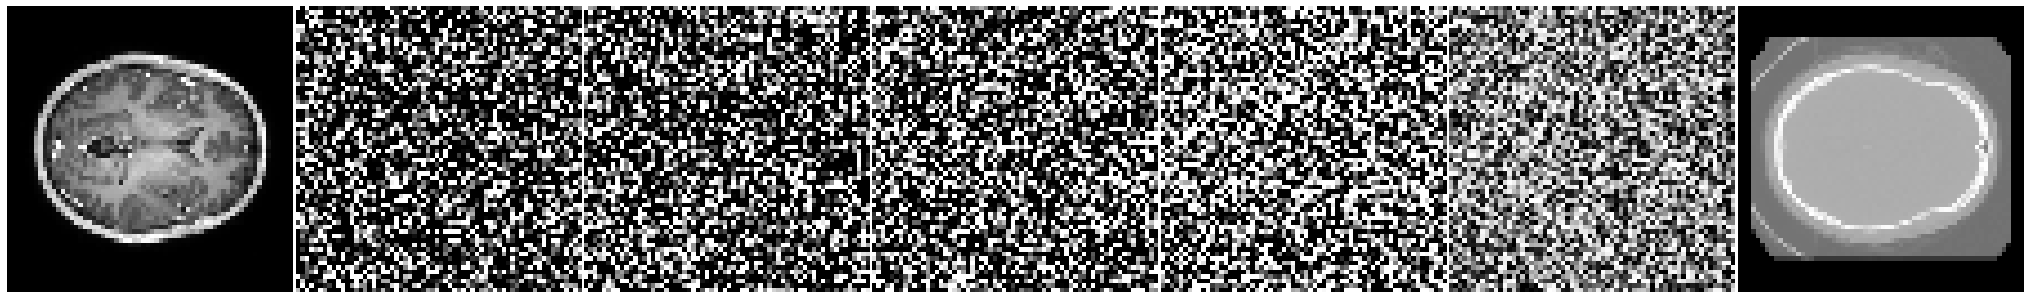

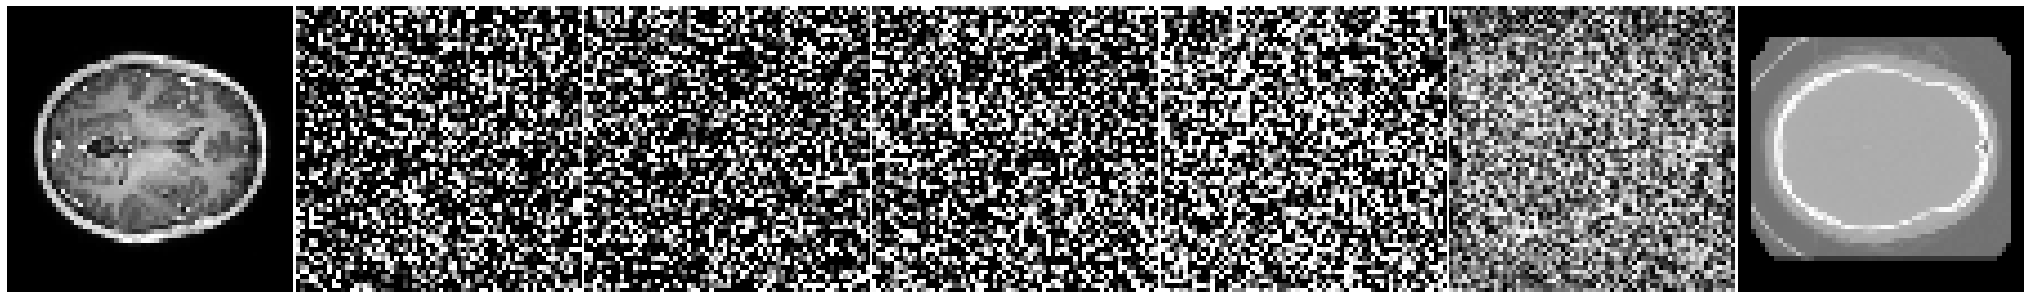

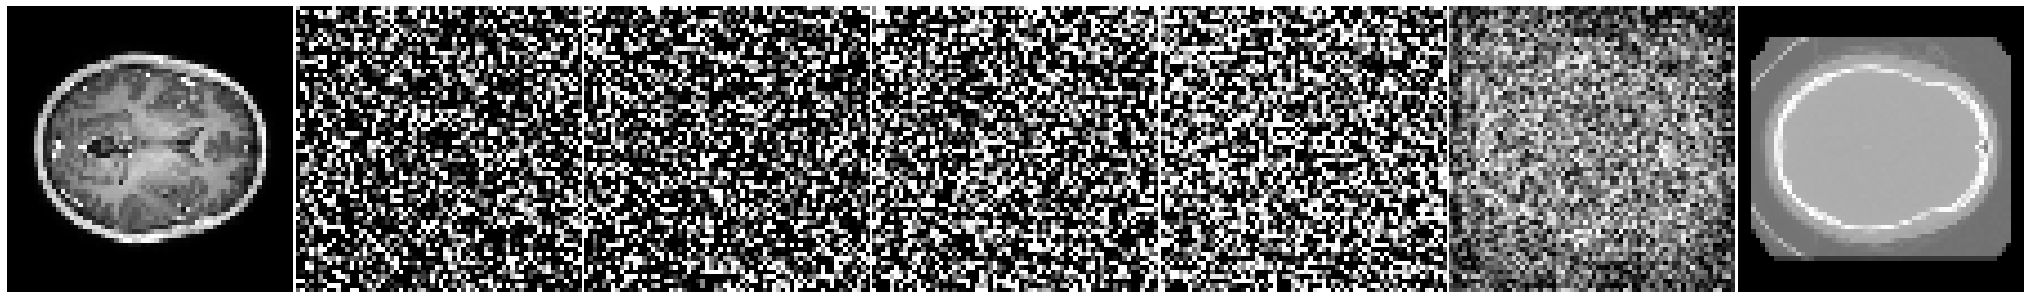

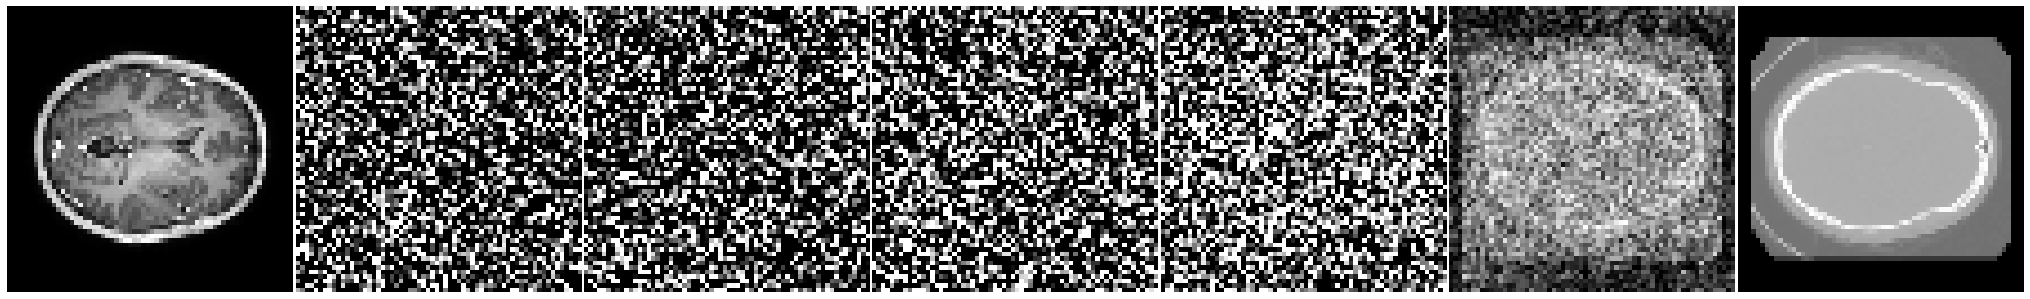

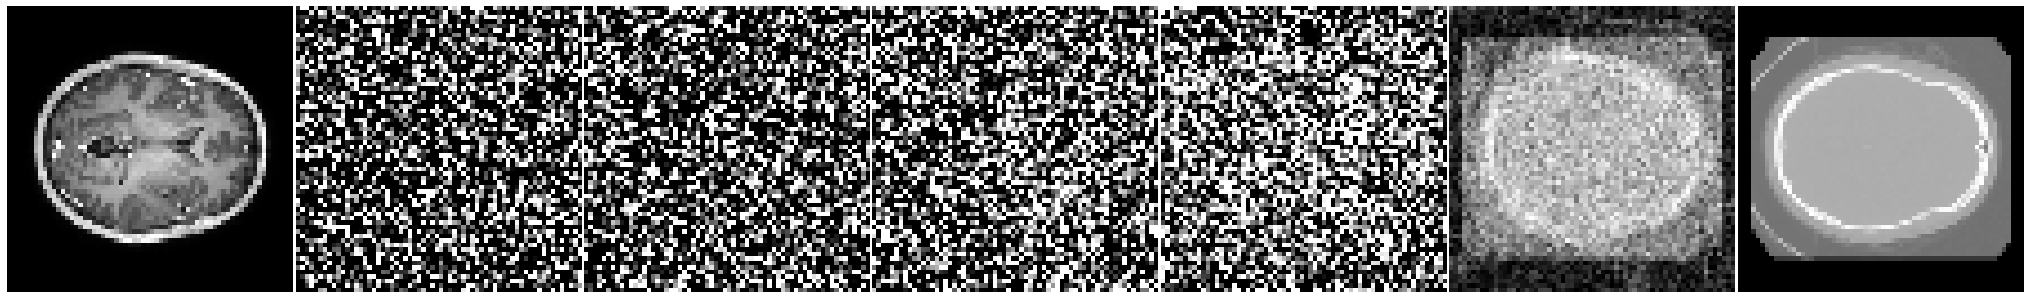

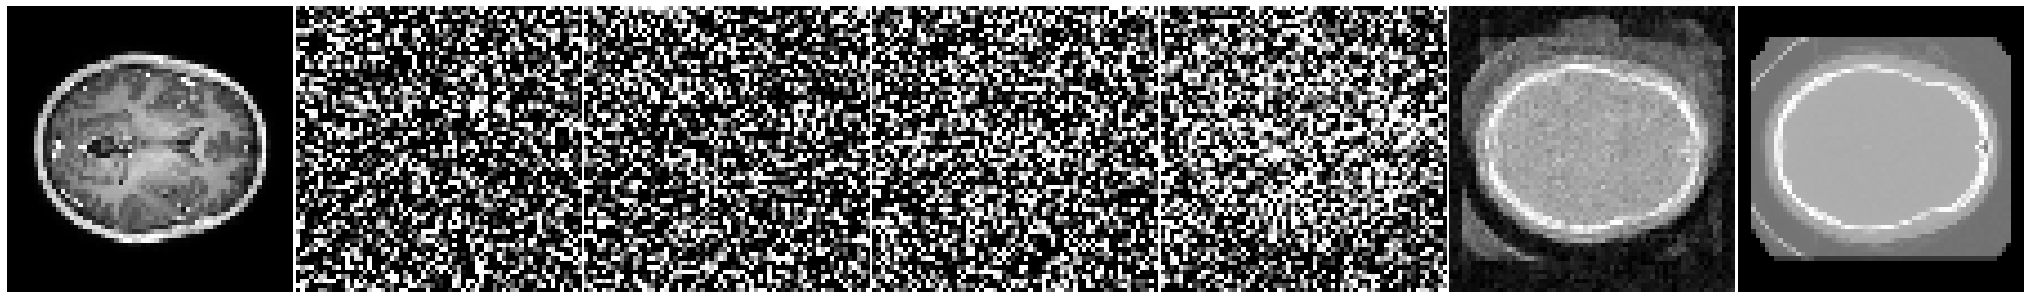

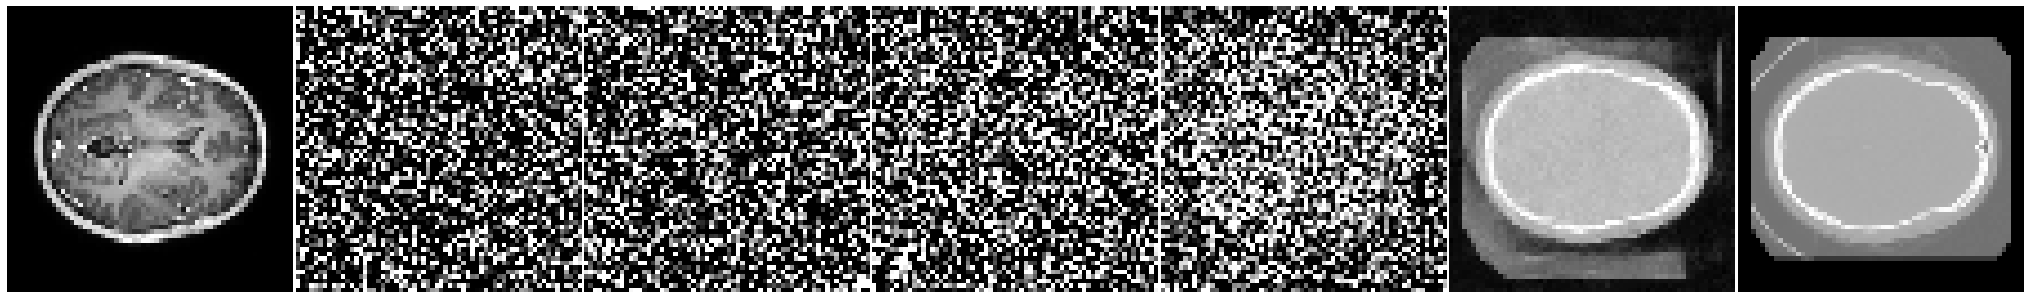

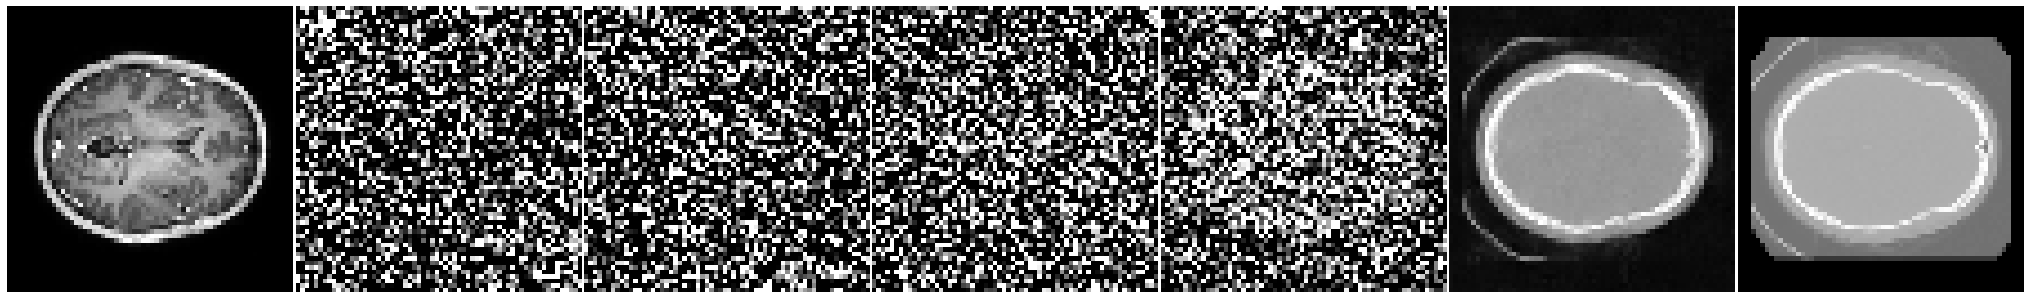

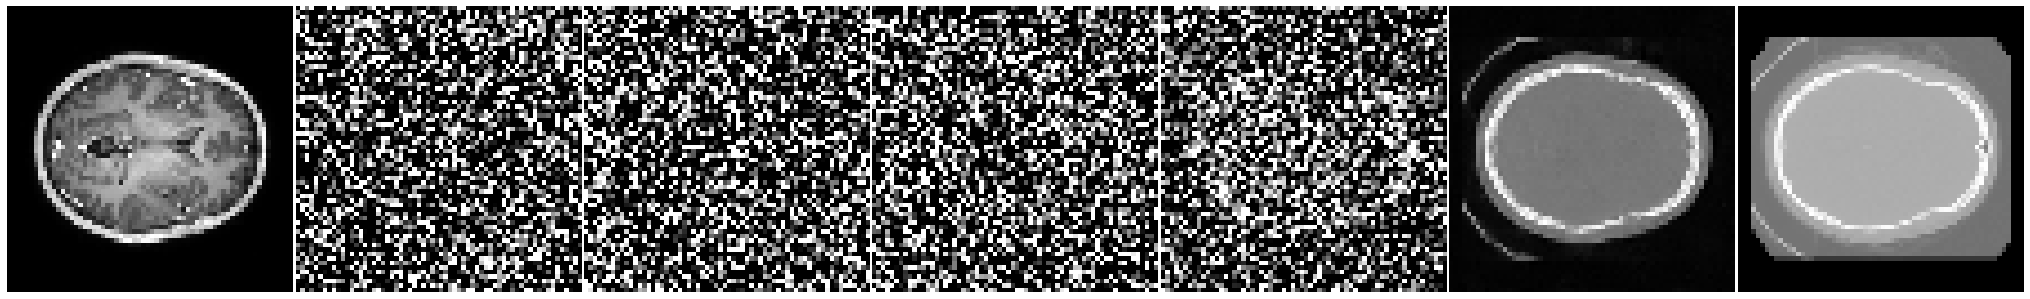

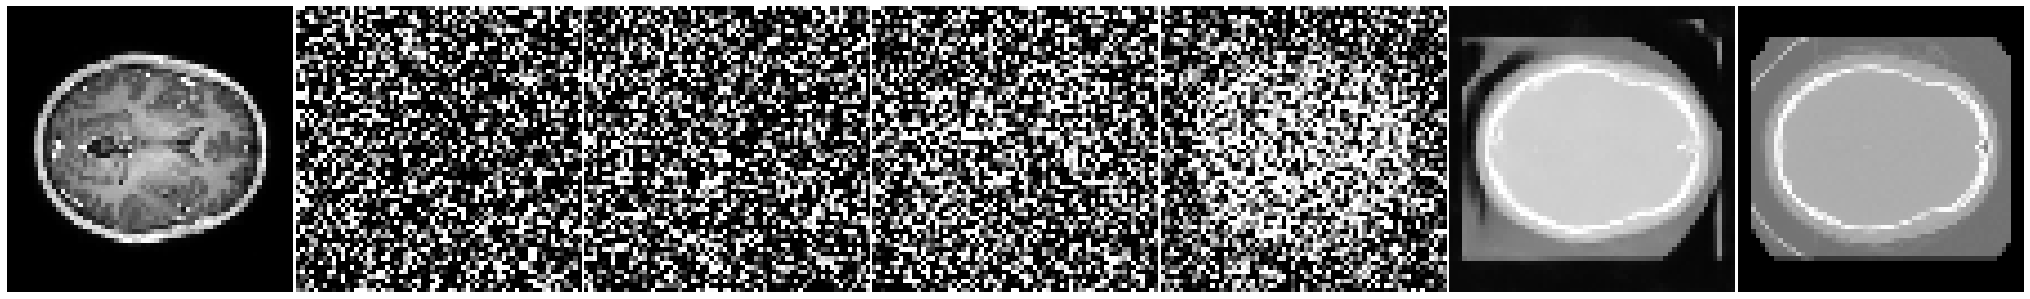

In [28]:
# train.py DDPM folder
import sys
import copy
import os
import warnings
import scipy.io as sio
from absl import app, flags
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import gridspec

import torch
from torch.utils.data import DataLoader

# from diffusion import GaussianDiffusionTrainer, GaussianDiffusionSampler
# from model import UNet
# from Dataset.dataset import Train_Data, Valid_Data


train = True
continue_train = False

# UNet
ch = 64
ch_mult = [1, 2, 2, 4, 4]
attn = [1]
num_res_blocks = 2
dropout = 0.

# Gaussian Diffusion
beta_1 = 1e-4
beta_T = 0.02
T = 1000

# Training
lr = 1e-4
grad_clip = 1.
img_size = 64
batch_size = 2
num_workers = 1
ema_decay = 0.9999

# Logging & Sampling
DIREC = 'ddpm-unet'
sample_size = 1
# max_epoch = 5000
max_epoch = 100

device = torch.device('cuda:0')


def ema(source, target, decay):
    source_dict = source.state_dict()
    target_dict = target.state_dict()
    for key in source_dict.keys():
        target_dict[key].data.copy_(
            target_dict[key].data * decay +
            source_dict[key].data * (1 - decay))

def train():
    # dataset
    tr_train = Train_Data()
    trainloader = DataLoader(tr_train, batch_size=batch_size, num_workers=num_workers,
                             pin_memory=True, shuffle=True)
    va_train = Valid_Data()
    validloader = DataLoader(va_train, batch_size=sample_size, num_workers=num_workers,
                              pin_memory=True, shuffle=False)

    # model setup
    net_model = UNet(
        T=T, ch=ch, ch_mult=ch_mult, attn=attn,
        num_res_blocks=num_res_blocks, dropout=dropout)
    ema_model = copy.deepcopy(net_model)


    optim = torch.optim.Adam(net_model.parameters(), lr=lr)

    trainer = GaussianDiffusionTrainer(
        net_model, beta_1, beta_T, T).to(device)
    ema_sampler = GaussianDiffusionSampler(
        ema_model, beta_1, beta_T, T, img_size).to(device)


    # show model size
    model_size = 0
    for param in net_model.parameters():
        model_size += param.data.nelement()
    print('Model params: %.2f M' % (model_size / 1024 / 1024))

    if continue_train:
        checkpoint = torch.load('./Save/' + DIREC + '/model_latest.pkl', map_location="cuda:0")
        net_model.load_state_dict(checkpoint['net_model'])
        ema_model.load_state_dict(checkpoint['ema_model'])
        optim.load_state_dict(checkpoint['optim'])
        restore_epoch = checkpoint['epoch']
        print('Finish loading model')
    else:
        restore_epoch = 0

    if not os.path.exists('Loss'):
        os.makedirs('Loss')

    tr_ls = []
    if continue_train:
        readmat = sio.loadmat('./Loss/' + DIREC)
        load_tr_ls = readmat['loss']
        for i in range(restore_epoch):
            tr_ls.append(load_tr_ls[0][i])
        print('Finish loading loss!')

    for epoch in range(restore_epoch, max_epoch):
        with tqdm(trainloader, unit="batch") as tepoch:
            tmp_tr_loss = 0
            tr_sample = 0
            net_model.train()
            for data, target in tepoch:
                tepoch.set_description(f"Epoch {epoch}")

                # train
                optim.zero_grad()
                condition = data.to(device)
                x_0 = target.to(device)

                loss = trainer(x_0, condition)
                tmp_tr_loss += loss.item()
                tr_sample += len(data)

                loss.backward()

                torch.nn.utils.clip_grad_norm_(
                    net_model.parameters(), grad_clip)
                optim.step()
                ema(net_model, ema_model, ema_decay)

                tepoch.set_postfix({'Loss': loss.item()})

        tr_ls.append(tmp_tr_loss / tr_sample)
        sio.savemat('./Loss/' + DIREC +'.mat', {'loss': tr_ls})

        if not os.path.exists('Train_Output/' + DIREC):
            os.makedirs('Train_Output/' + DIREC)
        net_model.eval()
        if (epoch+1) % 10 == 0:
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(validloader):
                    if batch_idx == 0:
                        x_T = torch.randn(sample_size, 1, img_size, img_size)
                        x_T = x_T.to(device)

                        condition = data.to(device)
                        x_0 = ema_sampler(x_T, condition)

                        x_0_copy = len(x_0) * [None]

                        for i, img in enumerate(x_0):
                            img = np.array(img.cpu())
                            x_0_copy[i] = img

                        x_0_copy = np.array(x_0_copy)
                        save_path = f'./diff_results/x_0_epoch_{epoch+1}.npy'
                        np.save(save_path, x_0_copy)

                        fig = plt.figure()
                        fig.set_figheight(8)
                        fig.set_figwidth(28)
                        spec = gridspec.GridSpec(ncols=7, nrows=2,
                              width_ratios=[1,1,1,1,1,1,1], wspace=0.01,
                              hspace=0.01, height_ratios=[1,1],left=0,right=1,top=1,bottom=0)

                        img = data[0].data.squeeze()
                        ax = fig.add_subplot(spec[0])
                        ax.imshow(img, cmap='gray', vmin=0,vmax=1)
                        ax.axis('off')
                        # img = data[1].data.squeeze()
                        # ax = fig.add_subplot(spec[7])
                        # ax.imshow(img, cmap='gray', vmin=0,vmax=1)
                        # ax.axis('off')

                        count = 1
                        for kk in range(5): # x_0 [5,b,1,h,w]
                            imgs = x_0[kk] # imgs [b,1,h,w]
                            img = imgs[0].data.squeeze().cpu()
                            ax = fig.add_subplot(spec[count])
                            ax.imshow(img, cmap='gray', vmin=0,vmax=1)
                            ax.axis('off')

                            # imgs = x_0[kk] # imgs [b,1,h,w]
                            # img = imgs[1].data.squeeze().cpu()
                            # ax = fig.add_subplot(spec[count+7])
                            # ax.imshow(img, cmap='gray', vmin=0,vmax=1)
                            # ax.axis('off')

                            count += 1

                        img = target[0].data.squeeze().cpu()
                        ax = fig.add_subplot(spec[6])
                        ax.imshow(img, cmap='gray', vmin=0,vmax=1)
                        ax.axis('off')
                        # img = target[1].data.squeeze().cpu()
                        # ax = fig.add_subplot(spec[13])
                        # ax.imshow(img, cmap='gray', vmin=0,vmax=1)
                        # ax.axis('off')

                        plt.savefig('./Train_Output/'+ DIREC + '/Epoch_' + str(epoch+1) + '.png',
                                    bbox_inches='tight', pad_inches=0)

        # save
        if not os.path.exists('Save/' + DIREC):
            os.makedirs('Save/' + DIREC)
        ckpt = {
            'net_model': net_model.state_dict(),
            'ema_model': ema_model.state_dict(),
            'optim': optim.state_dict(),
            'epoch': epoch+1,
            # 'x_T': x_T,
        }
        # if (epoch+1) % 20 == 0:
        #     torch.save(ckpt, './Save/' + DIREC + '/model_epoch_'+str(epoch+1)+'.pkl')
        torch.save(ckpt, './Save/' + DIREC + '/model_latest.pkl')


train()

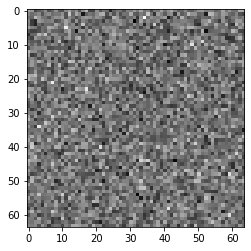

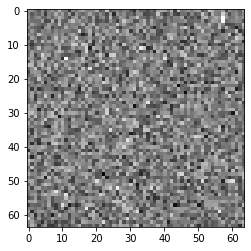

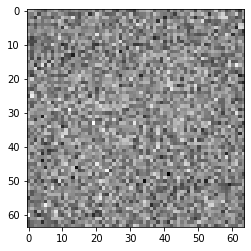

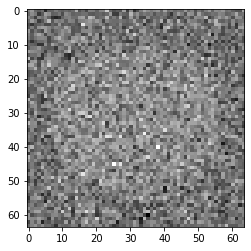

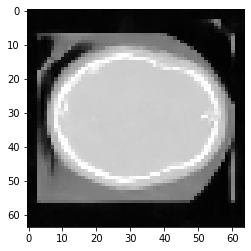

In [72]:
epoch = 100
diff_outs = np.load(f'./diff_results/x_0_epoch_{epoch}.npy')

for j in range(5):
    out = diff_outs[j]
    out = np.reshape(out, (img_size, img_size, 1))
    plt.imshow(out, cmap='gray')
    plt.show()

In [73]:
from ignite.metrics import PSNR, SSIM
from collections import OrderedDict

import torch
from torch import nn, optim

from ignite.engine import *
from ignite.handlers import *
from ignite.metrics import *
from ignite.utils import *
from ignite.contrib.metrics.regression import *
from ignite.contrib.metrics import *

# create default evaluator for doctests

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

In [74]:
out = np.reshape(out, (1, img_size, img_size))
out = torch.tensor(out)

In [75]:
ct_sample = ct_test_resized[0]
ct_sample = np.reshape(ct_sample, (1, img_size, img_size))
ct_sample = torch.tensor(ct_sample)

In [76]:
output = out.unsqueeze(0)
test_sample = ct_sample.unsqueeze(0)

In [77]:
metric = SSIM(data_range=1.0)
metric.attach(default_evaluator, 'ssim')

state = default_evaluator.run([[output, test_sample]])

print(state.metrics['ssim'])

0.5971633237196476
